In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('dados/brain_stroke.csv')
dados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
dados.shape

(4981, 11)

In [4]:
dados.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

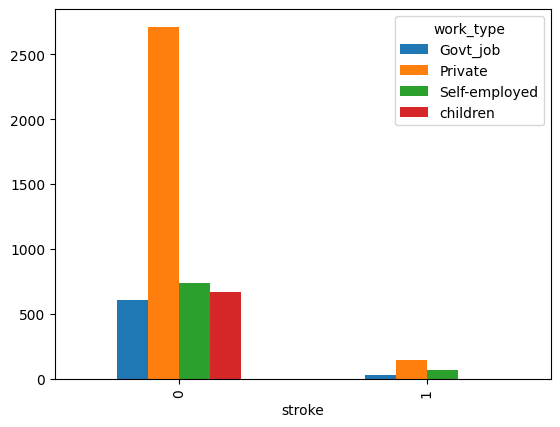

In [5]:
import matplotlib.pyplot as plt
strokes_by= dados.groupby(['stroke', 'work_type']).size().unstack()

ax = strokes_by.plot(kind='bar')

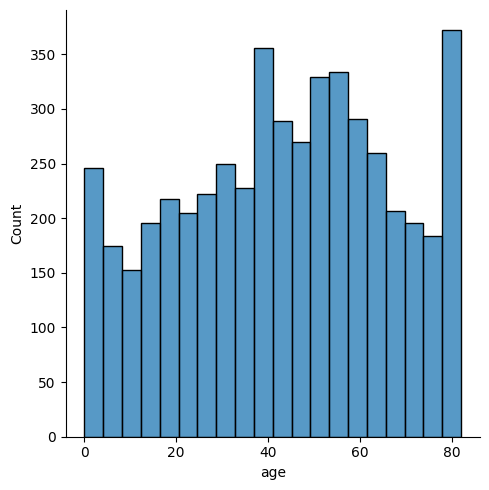

In [6]:
import seaborn as sns
sns.displot(data=dados, x='age')

In [7]:
dados['smoking_status'].value_counts()

smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64

In [8]:
dados['Residence_type'].value_counts()

Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64

In [9]:
dados['work_type'].value_counts()

work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64

In [10]:
dados['ever_married'].value_counts()

ever_married
Yes    3280
No     1701
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['smoking_status', 'work_type', 'Residence_type', 'ever_married', 'gender']]).toarray()

dados2 = dados.drop(columns=['smoking_status', 'work_type', 'Residence_type', 'ever_married', 'gender'], axis=1)
dados_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns= ohe.get_feature_names_out(['smoking_status', 'work_type',
                                                                                                 'Residence_type', 'ever_married', 'gender']))], axis=1)
dados_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1
1,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
2,49.0,0,0,171.23,34.4,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1


### Variável target esta desbalanciada

<Axes: xlabel='stroke', ylabel='count'>

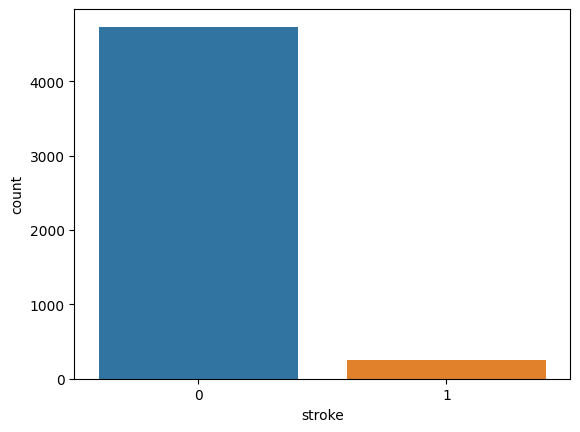

In [12]:
sns.countplot(x='stroke', data=dados_dummies)

In [13]:
!pip install -U imbalanced-learn

### Usando over-sampling para resolver o problema
<p>SMOTE cria dados sintéticos da classe minoritária até que a base de treinamento atinja o equilíbrio 50% para as classes.</p>

In [14]:
from imblearn.over_sampling import SMOTE

X = dados_dummies.drop('stroke', axis=1)
y = dados_dummies['stroke']

smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

dados_dummies = pd.concat([X, y], axis=1)
dados_dummies.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male,stroke
0,67.0,0,1,228.69,36.6,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1
1,80.0,0,1,105.92,32.5,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1
2,49.0,0,0,171.23,34.4,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1


<Axes: xlabel='stroke', ylabel='count'>

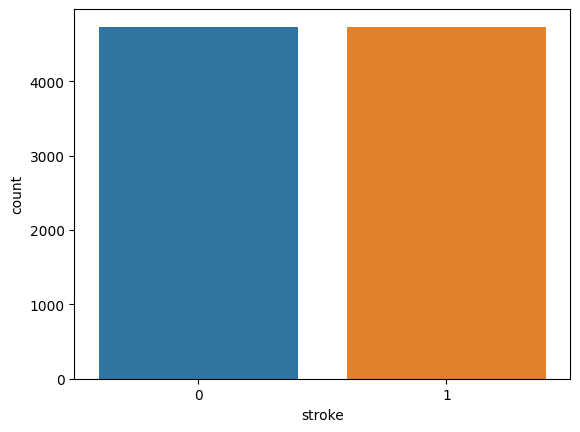

In [15]:
sns.countplot(x='stroke', data=dados_dummies)

In [35]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#dados_padron = scaler.fit_transform(dados_dummies.drop(columns=['stroke'], axis=1))
#dados_padron = pd.DataFrame(dados_padron, columns=['age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','work_type_Govt_job','work_type_Private','work_type_Self employed','work_type_children','Residence_type_Rural','Residence_type_Urban','ever_married_No','ever_married_Yes', 'gender_Female', 'gender_Male'])
#dados_trat = pd.concat([dados_dummies['stroke'], dados_padron], axis=1)
#dados_trat.head()

In [26]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

x = dados_dummies.drop(columns=['stroke'])
y = dados_dummies['stroke']

cv= KFold(n_splits=5, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
                    
def imprime_resultados(results):
    media = results['test_score'].mean() * 100
    desvio = results['test_score'].std() * 100
    print("Accuracy médio %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))
                    
imprime_resultados(results)

Accuracy médio 79.71
Intervalo [76.94, 82.47]


In [27]:
def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = KFold(n_splits = 10, shuffle=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x, y, cv = cv, return_train_score=True)
    print('Arvore max_depth = %d, treino = %.2f, teste = %.2f' % (max_depth, results['train_score'].mean() * 100, 
                                                                  results['test_score'].mean() * 100))
          
for i in range(1,33):
    roda_arvore_de_decisao(i)

Arvore max_depth = 1, treino = 77.23, teste = 76.79
Arvore max_depth = 2, treino = 78.23, teste = 77.76
Arvore max_depth = 3, treino = 80.28, teste = 79.33
Arvore max_depth = 4, treino = 83.14, teste = 82.15
Arvore max_depth = 5, treino = 86.59, teste = 86.03
Arvore max_depth = 6, treino = 89.00, teste = 88.07
Arvore max_depth = 7, treino = 91.03, teste = 89.78
Arvore max_depth = 8, treino = 92.44, teste = 91.05
Arvore max_depth = 9, treino = 94.06, teste = 91.73
Arvore max_depth = 10, treino = 96.00, teste = 93.22
Arvore max_depth = 11, treino = 97.11, teste = 93.74
Arvore max_depth = 12, treino = 98.07, teste = 94.23
Arvore max_depth = 13, treino = 98.78, teste = 94.35
Arvore max_depth = 14, treino = 99.30, teste = 94.28
Arvore max_depth = 15, treino = 99.61, teste = 94.34
Arvore max_depth = 16, treino = 99.81, teste = 94.41
Arvore max_depth = 17, treino = 99.91, teste = 94.57
Arvore max_depth = 18, treino = 99.97, teste = 94.36
Arvore max_depth = 19, treino = 99.99, teste = 94.43
Ar

In [28]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = KFold(n_splits = 5, shuffle=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
    results = cross_validate(modelo, x, y, cv = cv, return_train_score=True)
    fit_time = results["fit_time"].mean()
    score_time = results["score_time"].mean()
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100

    tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            for min_samples_split in [32, 64, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train", "test", 
                                                    "fit_time", "score_time"])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,77.255427,76.917494,0.009011,0.003108
1,1,32,64,77.255427,76.917494,0.011633,0.002815
2,1,32,128,77.255427,76.917494,0.009560,0.001120
3,1,32,256,77.255427,76.917494,0.009101,0.001343
4,1,64,32,77.255427,76.917494,0.009930,0.002866


In [29]:
resultados.sort_values('test', ascending=False).head(10)

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
256,17,32,32,92.517967,90.946554,0.035653,0.002495
273,18,32,64,92.517967,90.946554,0.033968,0.003079
257,17,32,64,92.517967,90.946554,0.033617,0.002911
400,26,32,32,92.517967,90.946554,0.033340,0.003208
401,26,32,64,92.517967,90.946554,0.033526,0.000971
481,31,32,64,92.517967,90.946554,0.031816,0.002431
448,29,32,32,92.517967,90.946554,0.035415,0.003431
241,16,32,64,92.517967,90.946554,0.052823,0.003829
240,16,32,32,92.517967,90.946554,0.032989,0.003181
225,15,32,64,92.517967,90.946554,0.029486,0.004685


<Axes: >

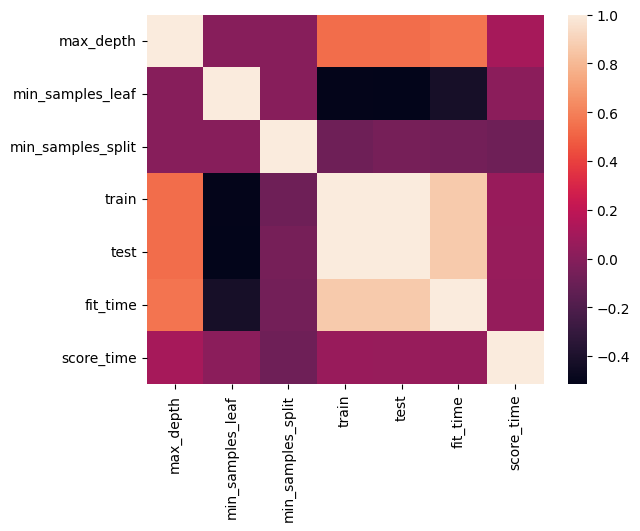

In [30]:
corr = resultados.corr()
sns.heatmap(resultados.corr())

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 9),
    "min_samples_split": randint(32, 128, 257),
    "min_samples_leaf": randint(32, 128, 257),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 80,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x, y)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)



resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 127.31 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.568734,0.018238,0.020669,0.003299,False,gini,7,307,350,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.866948,0.866878,0.872161,0.879028,0.874802,0.871963,0.004669,6
1,0.405135,0.025617,0.021297,0.002492,True,gini,7,345,361,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.841605,0.833069,0.820919,0.844163,0.846804,0.837312,0.009404,65
2,0.309601,0.012492,0.017287,0.002691,True,gini,3,383,341,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.834741,0.817221,0.819863,0.816693,0.837824,0.825268,0.009109,73
3,0.212829,0.009350,0.011307,0.004039,True,gini,3,314,330,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.818902,0.800317,0.807713,0.846276,0.825145,0.819670,0.015849,80
4,0.337596,0.026425,0.016416,0.002751,True,gini,8,309,345,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.836853,0.831484,0.816165,0.864765,0.848917,0.839637,0.016387,60


In [32]:
from sklearn.model_selection import cross_val_score

def imprime_scores(scores):
    media = scores.mean() * 100
    desvio = scores.std() * 100
    print("Accuracy médio %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

tic = time.time()
scores = cross_val_score(busca, x, y, cv= KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_scores(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 519.93 segundos
Accuracy médio 86.59
Intervalo [82.38, 90.81]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       min_samples_leaf=300, min_samples_split=367,
                       n_estimators=93)


In [33]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6,
                       min_samples_leaf=300, min_samples_split=367)
model.fit(x, y)
previsoes = model.predict(x)

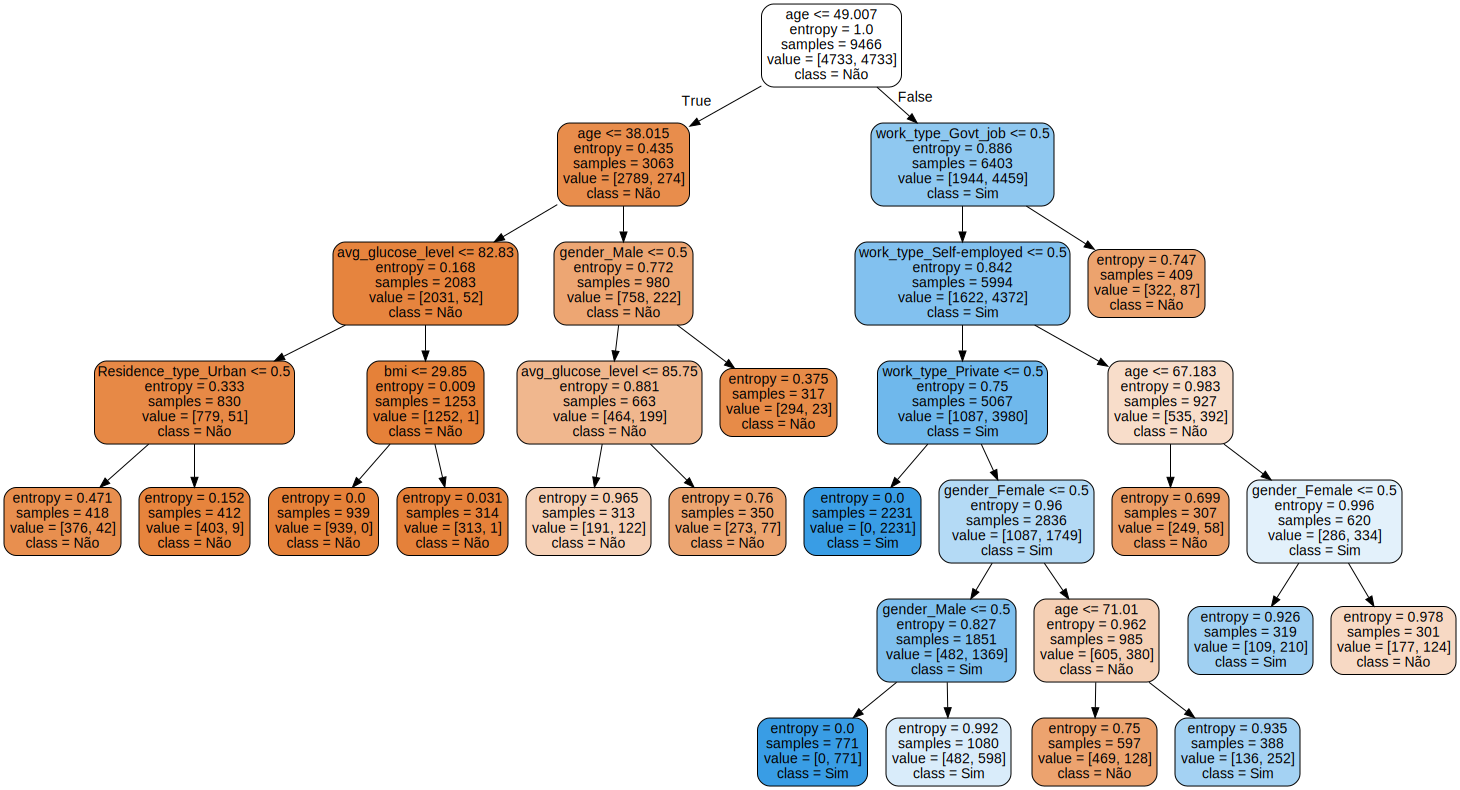

In [34]:
import graphviz
from sklearn.tree import export_graphviz

feature=x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled=True, rounded=True,
                           feature_names=feature,
                           class_names=["Não", "Sim"])
grafico = graphviz.Source(dot_data)
grafico